<a href="https://colab.research.google.com/github/jscott0761/C195-PA/blob/master/C964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#matplotlib inline

crimeData = pandas.read_csv('/US_Crime_Rates_1960_2014.csv')

print(crimeData)

    Year  Population     Total  Violent  Property  Murder  Forcible_Rape  \
0   1960   179323175   3384200   288460   3095700    9110          17190   
1   1961   182992000   3488000   289390   3198600    8740          17220   
2   1962   185771000   3752200   301510   3450700    8530          17550   
3   1963   188483000   4109500   316970   3792500    8640          17650   
4   1964   191141000   4564600   364220   4200400    9360          21420   
5   1965   193526000   4739400   387390   4352000    9960          23410   
6   1966   195576000   5223500   430180   4793300   11040          25820   
7   1967   197457000   5903400   499930   5403500   12240          27620   
8   1968   199399000   6720200   595010   6125200   13800          31670   
9   1969   201385000   7410900   661870   6749000   14760          37170   
10  1970   203235298   8098000   738820   7359200   16000          37990   
11  1971   206212000   8588200   816500   7771700   17780          42260   
12  1972   2

# Time Series Plot
### This time series plot shows the trend in overall crime rate over time


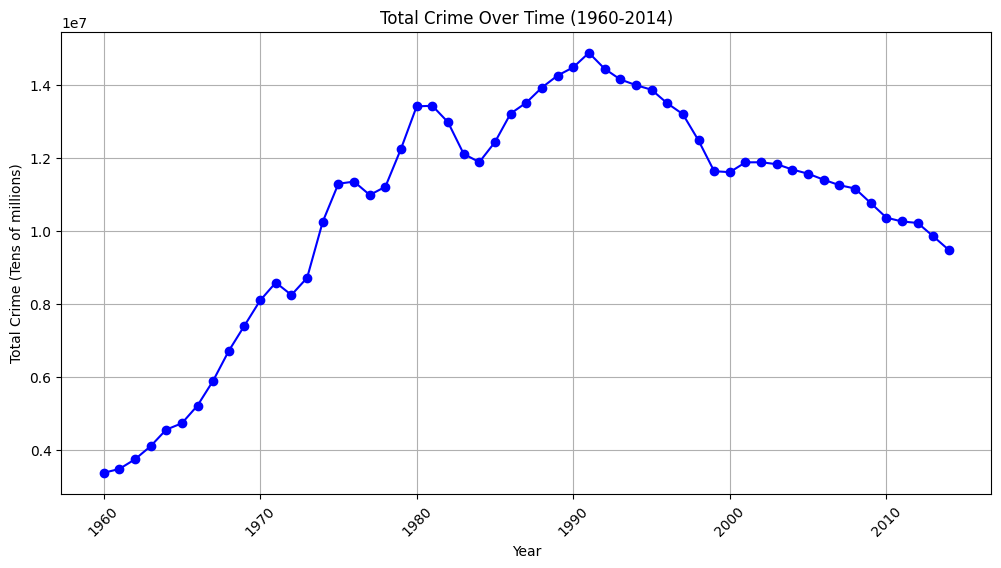

In [31]:
crimeData['Year'] = pandas.to_datetime(crimeData['Year'], format='%Y')
crimeData.set_index('Year', inplace=True)

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(crimeData.index, crimeData['Total'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Crime (Tens of millions)')
plt.title('Total Crime Over Time (1960-2014)')
plt.grid(True)
plt.xticks(rotation=45)


plt.show()

# Heatmap
### The following heatmap shows correlations between variables contribtuing to crime

<Axes: >

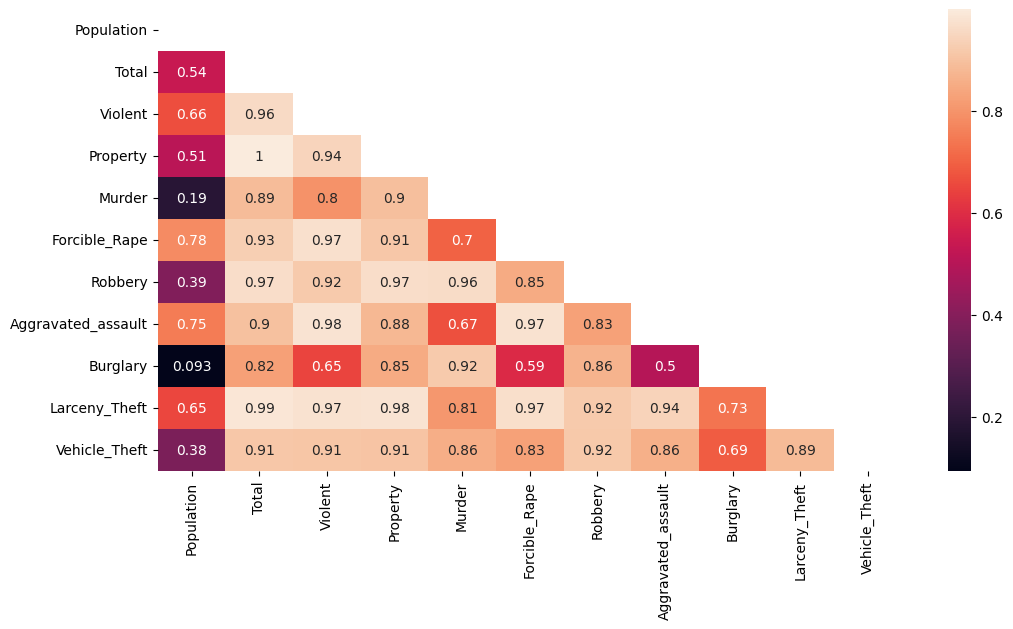

In [32]:
mask = np.zeros_like(crimeData.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(12,6))
sns.heatmap(crimeData.corr(), mask=mask, annot=True)

# Pie Chart
### The pie chart below shows the breakdown of total crime by type

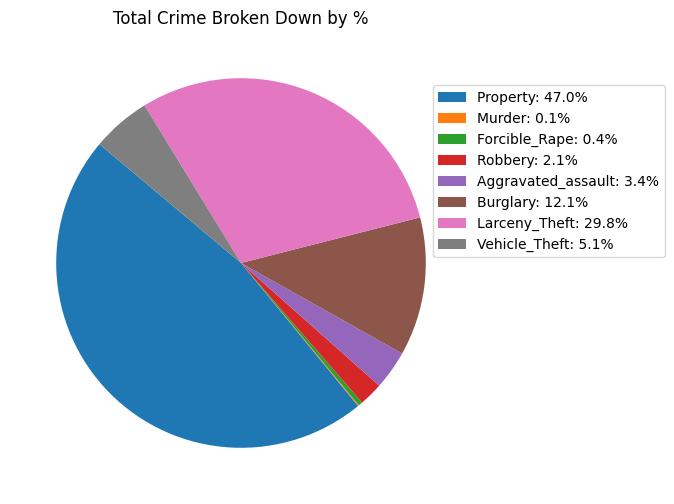

In [33]:
crime_type_totals = crimeData[['Property', 'Murder', 'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']].sum()

plt.figure(figsize=(12, 6))
pie = plt.pie(crime_type_totals, startangle=140, autopct='', labels=None)


legend_labels = [f'{crime_type}: {percentage:.1f}%' for crime_type, percentage in zip(crime_type_totals.index, crime_type_totals / sum(crime_type_totals) * 100)]

plt.legend(pie[0], legend_labels, loc="best", bbox_to_anchor=(0.9, 0.9))

plt.title('Total Crime Broken Down by %')
plt.show()





# ML Model Developed Utilizing Multivariable Regression

In [45]:
crime_type = 'Violent'

X = crimeData[['Population', 'Year']]
y = crimeData[crime_type]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

new_data = np.array([318857056, 2014])

X_df = pandas.DataFrame(X, columns=['Population', 'Year'])


predicted_crime_rate = model.predict(X_df)
print(f'Predicted {crime_type} Crime Rate for {new_data[0]} population in {new_data[1]}: {predicted_crime_rate[0]}')

Mean Squared Error: 34652638614.06485
R-squared: 0.8161594571736243
Predicted Violent Crime Rate for 318857056 population in 2014: 385539.3001822233
